In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, boxcox, probplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")


In [2]:
pwd


'C:\\Users\\Yudith\\Desktop\\Análisis de Datos\\MACHINE LEARNING\\NUEVO PROYECTO YUDI'

In [3]:
# Cargar dataset desde la carpeta indicada
ruta = r"C:\Users\Yudith\Desktop\Análisis de Datos\MACHINE LEARNING\NUEVO PROYECTO YUDI\dataset_pedidos_1.csv"
df = pd.read_csv(ruta, encoding="utf-8-sig")

# Verificamos las primeras filas
print(df.head())


   id_pedido  id_cliente categoria_producto            producto  cantidad  \
0       4147          23           Deportes  Camiseta deportiva         2   
1       3589         732        Electrónica          Smartwatch         1   
2        178         771             Libros       Libro técnico         1   
3       3283         912             Libros       Libro técnico         4   
4       1674         286             Libros           Biografía         3   

   precio_unitario  descuento  tiempo_entrega_dias  calificacion  \
0           323.44      0.129                    5          3.08   
1           387.75      0.140                    4          3.63   
2            19.56      0.070                    8          4.61   
3            80.00      0.042                    8          4.01   
4            33.68      0.017                    7          3.47   

   ingreso_total      metodo_pago       pais        subregion  \
0         563.43   Tarjeta Débito  Guatemala  Central America  

In [4]:
pd.read_csv(r"C:\Users\Yudith\Desktop\Análisis de Datos\MACHINE LEARNING\NUEVO PROYECTO YUDI\dataset_pedidos_1.csv", encoding='utf-8')


,id_pedido,id_cliente,categoria_producto,producto,cantidad,precio_unitario,descuento,tiempo_entrega_dias,calificacion,ingreso_total,metodo_pago,pais,subregion,fecha_pedido
0,4147,23,Deportes,Camiseta deportiva,2,323.44,0.129,5,3.08,563.43,Tarjeta Débito,Guatemala,Central America,2023-01-01 19:57:52
1,3589,732,Electrónica,Smartwatch,1,387.75,0.140,4,3.63,333.46,Transferencia,Panamá,Central America,2023-01-01 21:55:01
2,178,771,Libros,Libro técnico,1,19.56,0.070,8,4.61,18.19,Tarjeta Crédito,Honduras,Central America,2023-01-02 04:40:53
3,3283,912,Libros,Libro técnico,4,80.00,0.042,8,4.01,306.56,Tarjeta Crédito,Ecuador,South America,2023-01-02 05:07:06
4,1674,286,Libros,Biografía,3,33.68,0.017,7,3.47,99.32,Contraentrega,Brasil,South America,2023-01-02 06:14:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1265,610,Electrónica,Auriculares,1,401.89,0.057,2,4.27,378.98,PayPal,Perú,South America,2024-12-29 15:07:04
4996,2758,351,Belleza,Shampoo,1,136.90,0.061,5,4.24,128.55,Tarjeta Débito,Argentina,South America,2024-12-29 19:29:47
4997,4059,208,Juguetes,Muñeca,1,80.94,0.139,5,3.66,69.69,Tarjeta Débito,Estados Unidos,Northern America,2024-12-29 19:38:49
4998,2785,387,Moda,Pantalón,2,200.00,0.000,5,4.88,400.00,Tarjeta Débito,Cuba,Caribbean,2024-12-30 06:06:11


In [5]:
df = pd.read_csv(r"C:\Users\Yudith\Desktop\Análisis de Datos\MACHINE LEARNING\NUEVO PROYECTO YUDI\dataset_pedidos_1.csv", encoding='utf-8')


In [6]:
df.head()

,id_pedido,id_cliente,categoria_producto,producto,cantidad,precio_unitario,descuento,tiempo_entrega_dias,calificacion,ingreso_total,metodo_pago,pais,subregion,fecha_pedido
0,4147,23,Deportes,Camiseta deportiva,2,323.44,0.129,5,3.08,563.43,Tarjeta Débito,Guatemala,Central America,2023-01-01 19:57:52
1,3589,732,Electrónica,Smartwatch,1,387.75,0.140,4,3.63,333.46,Transferencia,Panamá,Central America,2023-01-01 21:55:01
2,178,771,Libros,Libro técnico,1,19.56,0.070,8,4.61,18.19,Tarjeta Crédito,Honduras,Central America,2023-01-02 04:40:53
3,3283,912,Libros,Libro técnico,4,80.00,0.042,8,4.01,306.56,Tarjeta Crédito,Ecuador,South America,2023-01-02 05:07:06
4,1674,286,Libros,Biografía,3,33.68,0.017,7,3.47,99.32,Contraentrega,Brasil,South America,2023-01-02 06:14:39


Limpieza de datos

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_pedido            5000 non-null   int64  
 1   id_cliente           5000 non-null   int64  
 2   categoria_producto   5000 non-null   object 
 3   producto             5000 non-null   object 
 4   cantidad             5000 non-null   int64  
 5   precio_unitario      5000 non-null   float64
 6   descuento            5000 non-null   float64
 7   tiempo_entrega_dias  5000 non-null   int64  
 8   calificacion         5000 non-null   float64
 9   ingreso_total        5000 non-null   float64
 10  metodo_pago          5000 non-null   object 
 11  pais                 5000 non-null   object 
 12  subregion            5000 non-null   object 
 13  fecha_pedido         5000 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 547.0+ KB


In [8]:
df.isnull().sum()

id_pedido              0
id_cliente             0
categoria_producto     0
producto               0
cantidad               0
precio_unitario        0
descuento              0
tiempo_entrega_dias    0
calificacion           0
ingreso_total          0
metodo_pago            0
pais                   0
subregion              0
fecha_pedido           0
dtype: int64

In [9]:
df[df.duplicated()]

,id_pedido,id_cliente,categoria_producto,producto,cantidad,precio_unitario,descuento,tiempo_entrega_dias,calificacion,ingreso_total,metodo_pago,pais,subregion,fecha_pedido


In [10]:
df.describe()

,id_pedido,id_cliente,cantidad,precio_unitario,descuento,tiempo_entrega_dias,calificacion,ingreso_total
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,499.232600,2.135800,261.738366,0.099785,4.546800,3.994680,505.234992
std,1443.520003,288.447958,1.255258,327.068143,0.048137,1.975801,0.572194,807.201605
min,1.000000,1.000000,1.000000,5.440000,0.000000,1.000000,2.070000,5.860000
25%,1250.750000,247.000000,1.000000,61.525000,0.066000,3.000000,3.600000,91.412500
50%,2500.500000,494.000000,2.000000,120.000000,0.100000,4.000000,4.000000,207.690000
75%,3750.250000,748.000000,3.000000,333.387500,0.133000,6.000000,4.410000,548.962500
max,5000.000000,1000.000000,9.000000,1500.000000,0.293000,11.000000,5.000000,9756.000000


In [11]:
df.describe(include = 'object')

,categoria_producto,producto,metodo_pago,pais,subregion,fecha_pedido
count,5000,5000,5000,5000,5000,5000
unique,7,35,5,19,4,4999
top,Juguetes,Lego,Tarjeta Débito,Costa Rica,South America,2024-04-20 07:44:35
freq,761,169,1062,383,1789,2


Estadística

DISPERSIÓN 

Seleccionamos solo las variables numéricas relevantes

In [12]:
variables_numericas = ['precio_unitario', 'cantidad', 'descuento', 'tiempo_entrega_dias', 'calificacion', 'ingreso_total']


Lista de variables numéricas

In [13]:
vars_num = ['precio_unitario', 'cantidad', 'descuento',
            'tiempo_entrega_dias', 'calificacion']

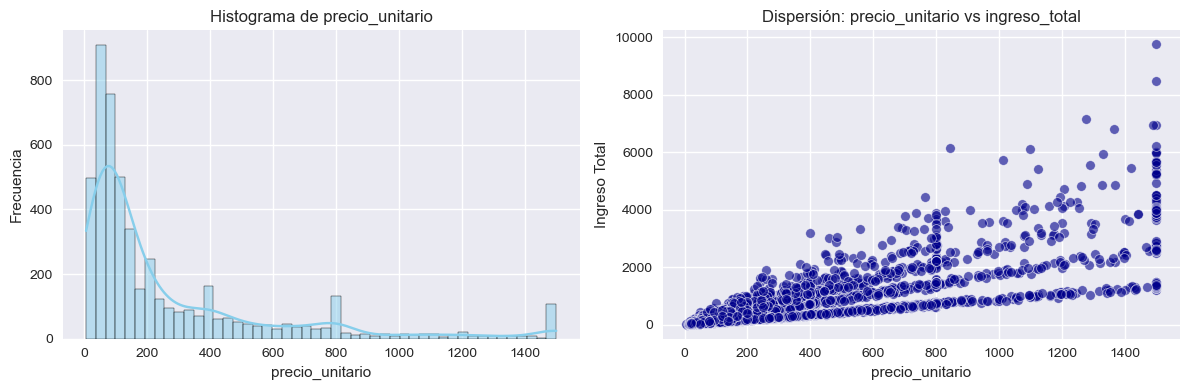

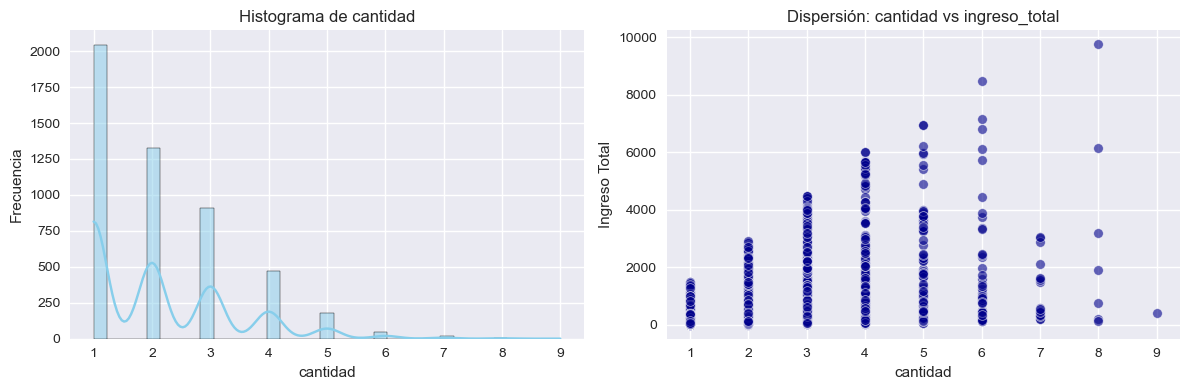

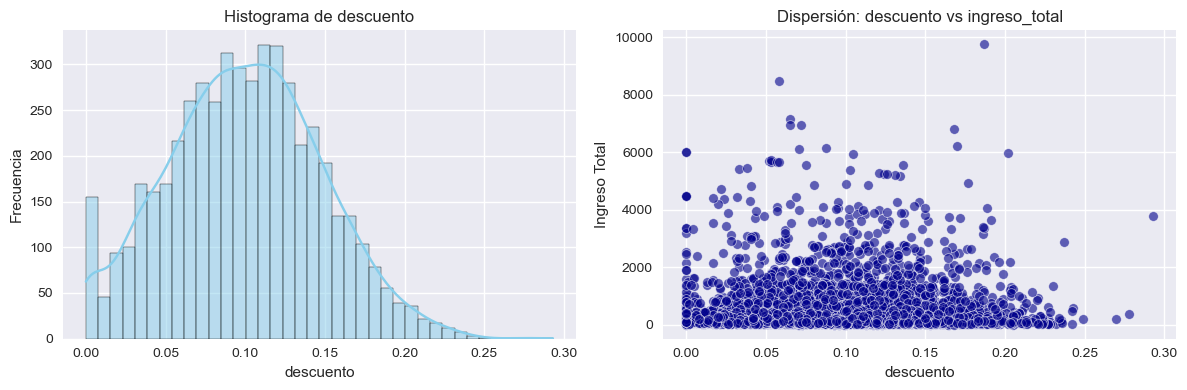

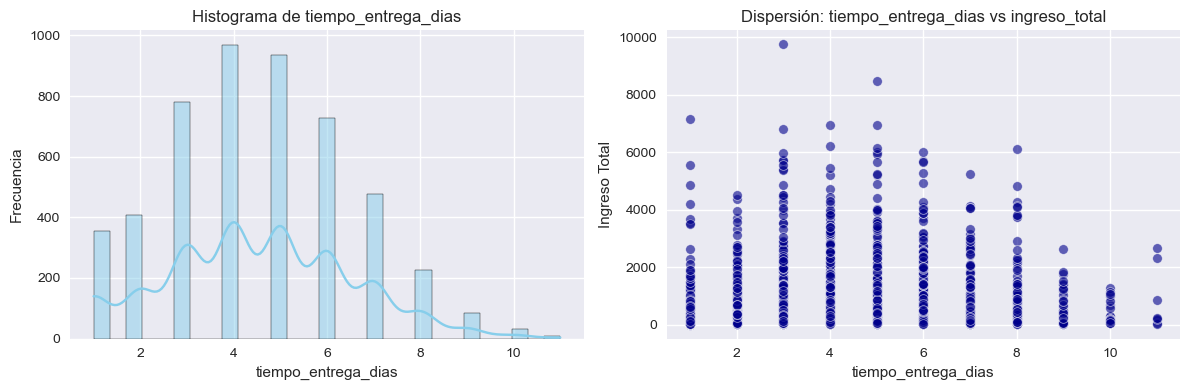

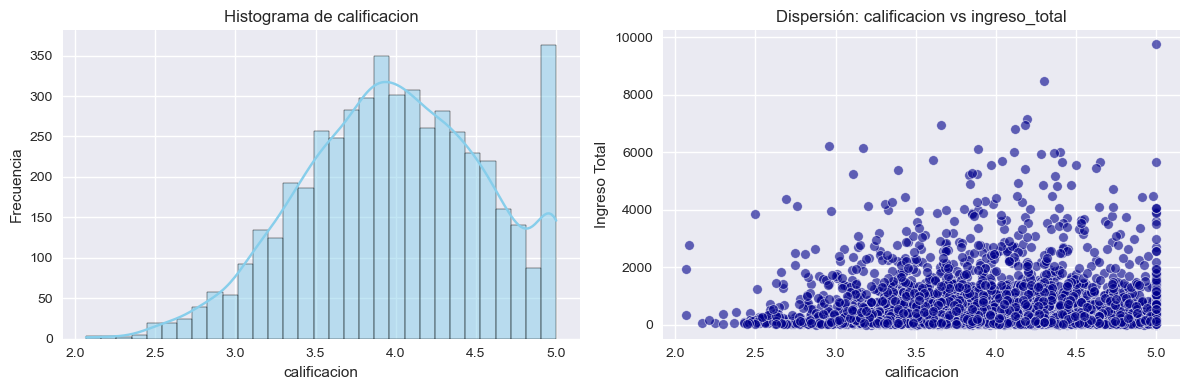

In [20]:
vars_num = ['precio_unitario', 'cantidad', 'descuento',
            'tiempo_entrega_dias', 'calificacion']

for var in vars_num:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[var], kde=True, color="skyblue")
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    
    plt.subplot(1,2,2)
    sns.scatterplot(x=df[var], y=df['ingreso_total'], alpha=0.6, color="darkblue")
    plt.title(f"Dispersión: {var} vs ingreso_total")
    plt.xlabel(var)
    plt.ylabel("Ingreso Total")
    
    plt.tight_layout()
    plt.show()


Prueba de Shapiro–Wilk + Q–Q plot

 Creamos un resumen de resultados

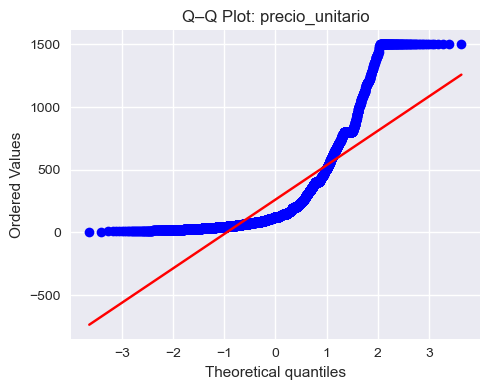

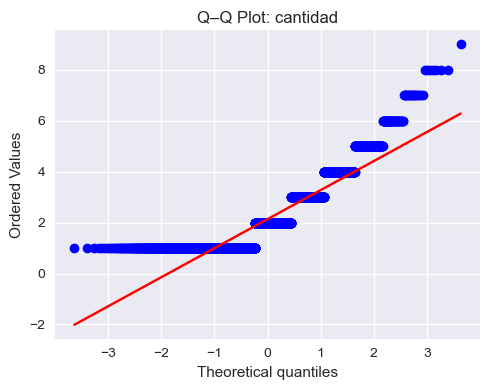

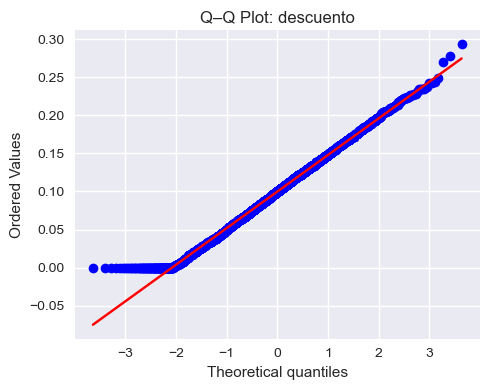

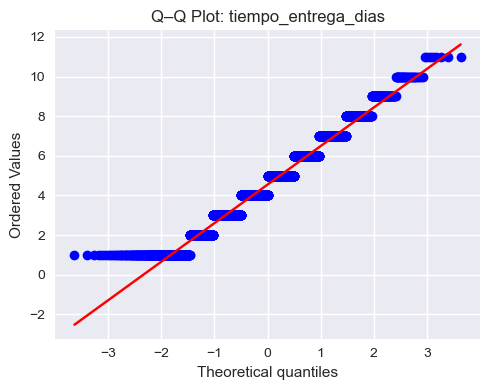

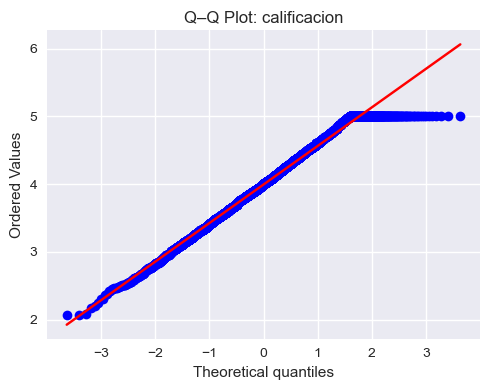

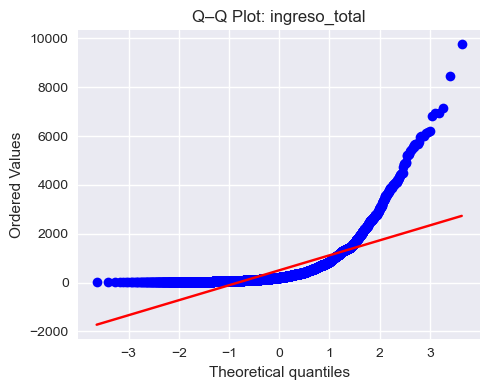

,Variable,Estadístico,p-valor,¿Normal?
0,precio_unitario,0.7023,0.0,No
1,cantidad,0.8242,0.0,No
2,descuento,0.9947,0.0,No
3,tiempo_entrega_dias,0.9683,0.0,No
4,calificacion,0.9863,0.0,No
5,ingreso_total,0.5766,0.0,No


In [21]:
resultados_normalidad = []

for var in variables_numericas:
    stat, p = shapiro(df[var])
    resultados_normalidad.append({
        'Variable': var,
        'Estadístico': round(stat, 4),
        'p-valor': round(p, 4),
        '¿Normal?': 'Sí' if p > 0.05 else 'No'
    })

    # Q–Q plot
    plt.figure(figsize=(5, 4))
    probplot(df[var], dist="norm", plot=plt)
    plt.title(f"Q–Q Plot: {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

import pandas as pd
pd.DataFrame(resultados_normalidad)

Código: Histograma + Boxplot por cada variable con bins calculados

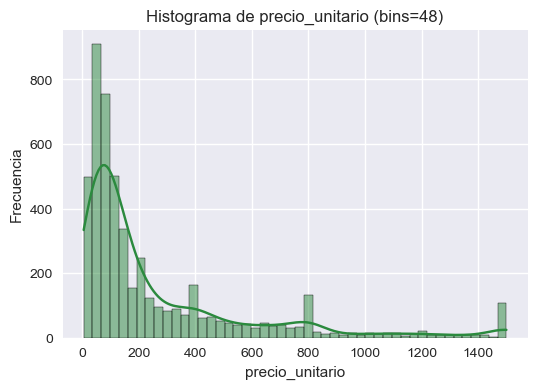

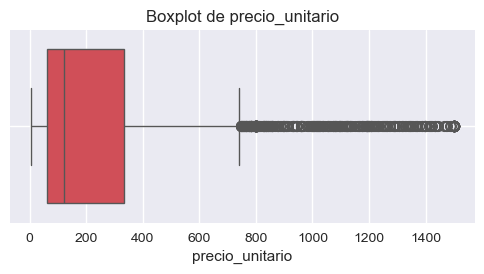

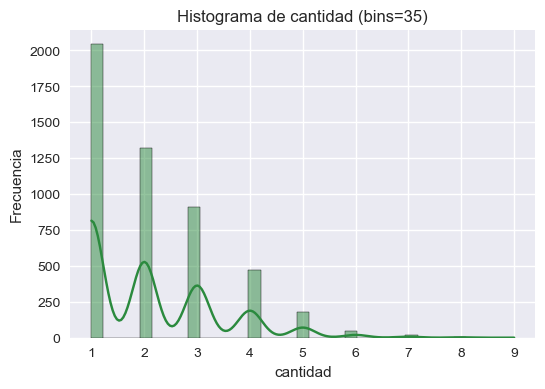

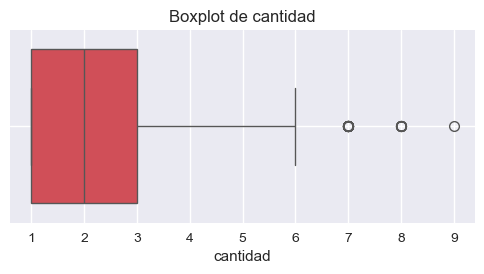

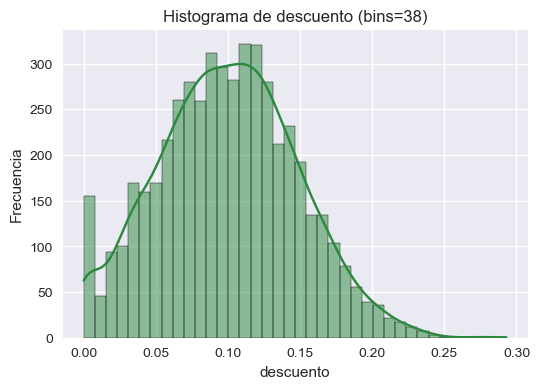

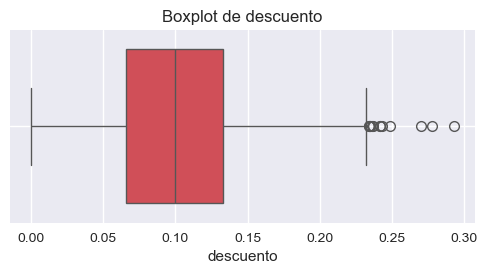

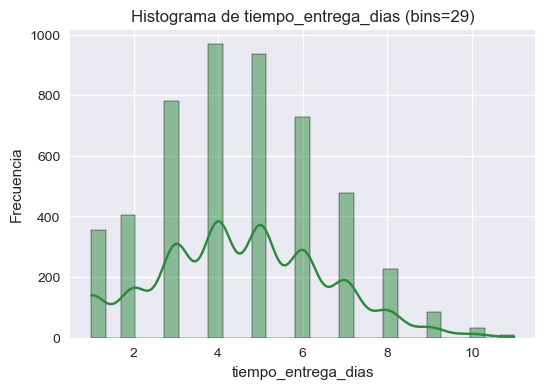

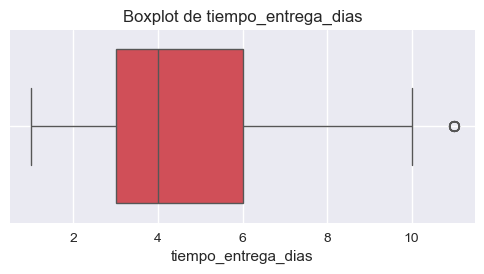

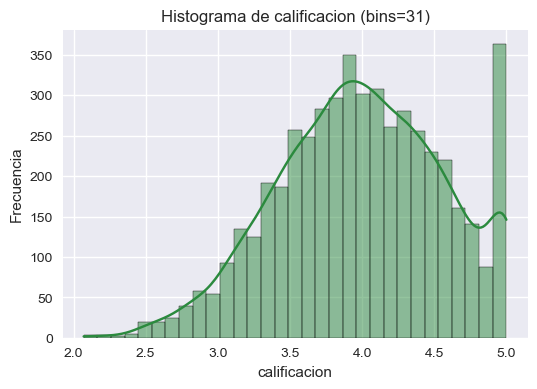

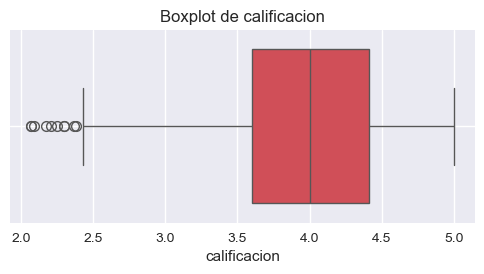

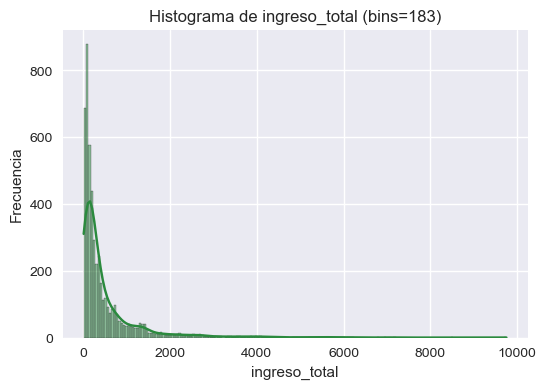

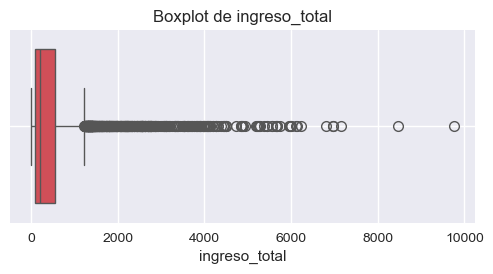

In [24]:
variables_numericas = ['precio_unitario', 'cantidad', 'descuento', 
                       'tiempo_entrega_dias', 'calificacion', 'ingreso_total']

def calcular_bins(series):
    n = len(series)
    q75, q25 = np.percentile(series, [75 ,25])
    iqr = q75 - q25
    bin_width = 2 * iqr * (n ** (-1/3))
    if bin_width == 0:
        return 10  # fallback
    bins = int(np.ceil((series.max() - series.min()) / bin_width))
    return max(10, bins)  # mínimo 10 bins

for var in variables_numericas:
    serie = df[var].dropna()
    bins = calcular_bins(serie)

    # --- Histograma ---
    plt.figure(figsize=(6,4))
    sns.histplot(serie, bins=bins, kde=True, color="#2b8a3e")
    plt.title(f"Histograma de {var} (bins={bins})")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

    # --- Boxplot ---
    plt.figure(figsize=(6,2.5))
    sns.boxplot(x=serie, color="#e63946")
    plt.title(f"Boxplot de {var}")
    plt.xlabel(var)
    plt.grid(True)
    plt.show()


Hay presencia de Outliers procederemos a investigar

Detectar outliers estadísticos (IQR)

In [25]:
variables = ['precio_unitario', 'cantidad', 'descuento',
             'tiempo_entrega_dias', 'calificacion', 'ingreso_total']

def resumen_iqr(df, cols):
    filas = []
    for c in cols:
        q1, q3 = df[c].quantile([0.25, 0.75])
        iqr = q3 - q1
        li = q1 - 1.5 * iqr
        ls = q3 + 1.5 * iqr
        n_out = ((df[c] < li) | (df[c] > ls)).sum()
        filas.append([c, q1, q3, iqr, li, ls, n_out])
    return pd.DataFrame(filas, columns=['Variable','Q1','Q3','IQR','Límite inferior','Límite superior','Outliers']).sort_values('Outliers', ascending=False)

tabla_iqr = resumen_iqr(df, variables)
tabla_iqr


,Variable,Q1,Q3,IQR,Límite inferior,Límite superior,Outliers
5,ingreso_total,91.4125,548.9625,457.5500,-594.91250,1235.28750,543
0,precio_unitario,61.5250,333.3875,271.8625,-346.26875,741.18125,497
1,cantidad,1.0000,3.0000,2.0000,-2.00000,6.00000,26
2,descuento,0.0660,0.1330,0.0670,-0.03450,0.23350,13
4,calificacion,3.6000,4.4100,0.8100,2.38500,5.62500,10
3,tiempo_entrega_dias,3.0000,6.0000,3.0000,-1.50000,10.50000,8


El dataset presenta una distribución heterogénea con presencia significativa de valores atípicos, sobre todo en variables monetarias (precio_unitario, ingreso_total).
Esto indica que antes de construir o volver a entrenar el modelo de predicción, es necesario realizar un tratamiento de outliers para mejorar la calidad de los datos y la precisión del modelo.

Listar los registros outliers por variable

Idea: inspección rápida de filas para entender el contexto.

In [18]:
def filas_outliers(df, col):
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    li = q1 - 1.5 * iqr
    ls = q3 + 1.5 * iqr
    return df[(df[col] < li) | (df[col] > ls)]

# Ejemplos
out_precio = filas_outliers(df, 'precio_unitario')
out_ingreso = filas_outliers(df, 'ingreso_total')
out_descuento = filas_outliers(df, 'descuento')

out_ingreso[['producto','cantidad','precio_unitario','pais','ingreso_total']].head(10)


,producto,cantidad,precio_unitario,pais,ingreso_total
9,Smartwatch,2,1500.00,Costa Rica,2487.00
31,Laptop,2,1369.19,Chile,2182.49
39,Tablet,4,1248.77,El Salvador,4265.80
53,Smartwatch,3,495.34,Panamá,1275.01
58,Cafetera,4,390.57,Uruguay,1379.49
60,Laptop,3,1500.00,México,3640.50
62,Auriculares,3,835.56,Honduras,2205.88
64,Smartwatch,3,546.10,Argentina,1631.75
65,Smartwatch,3,782.96,Chile,2182.11
75,Pelota,3,659.03,Costa Rica,1868.35


Los outliers detectados en ingreso_total no parecen ser errores, sino valores extremos válidos asociados a productos de alto precio o pedidos grandes.
Por lo tanto, no deben eliminarse ciegamente, sino tratarse con estrategias que mantengan su influencia sin distorsionar el modelo, como:

Aplicar transformación logarítmica a ingreso_total.

O bien capar solo los valores extremadamente altos (por encima del percentil 99).

Validar rango lógico (reglas de negocio)

Idea: detectar errores imposibles (fuera de dominio).

In [26]:
errores = pd.DataFrame({
    'cantidad_fuera_rango': (df['cantidad'] < 1) | (df['cantidad'] > 50),
    'descuento_fuera_rango': (df['descuento'] < 0) | (df['descuento'] > 0.5),
    'calificacion_fuera_rango': (df['calificacion'] < 1) | (df['calificacion'] > 5),
    'tiempo_entrega_fuera_rango': (df['tiempo_entrega_dias'] < 1) | (df['tiempo_entrega_dias'] > 30),
    'precio_negativo': (df['precio_unitario'] <= 0),
    'ingreso_negativo': (df['ingreso_total'] <= 0)
})
df[errores.any(axis=1)].head(10)


,id_pedido,id_cliente,categoria_producto,producto,cantidad,precio_unitario,descuento,tiempo_entrega_dias,calificacion,ingreso_total,metodo_pago,pais,subregion,fecha_pedido


Cruce de variables para validar outliers

In [27]:
q1, q3 = df['ingreso_total'].quantile([0.25, 0.75])
iqr = q3 - q1
limite_superior = q3 + 1.5 * iqr

outliers_ingreso = df[df['ingreso_total'] > limite_superior]


outliers_ingreso[['producto', 'categoria_producto', 'cantidad', 'precio_unitario', 'descuento', 'pais', 'metodo_pago', 'ingreso_total']].sort_values(by='ingreso_total', ascending=False).head(15)


,producto,categoria_producto,cantidad,precio_unitario,descuento,pais,metodo_pago,ingreso_total
2712,Smartwatch,Electrónica,8,1500.00,0.187,Estados Unidos,Contraentrega,9756.00
4109,Auriculares,Electrónica,6,1500.00,0.058,Guatemala,Tarjeta Débito,8478.00
3849,Auriculares,Electrónica,6,1274.60,0.065,Argentina,PayPal,7150.51
4037,Smartphone,Electrónica,5,1489.59,0.065,Jamaica,PayPal,6963.83
1904,Tablet,Electrónica,5,1500.00,0.072,Uruguay,Tarjeta Crédito,6960.00
4641,Tablet,Electrónica,6,1364.76,0.168,El Salvador,Tarjeta Débito,6812.88
3228,Tablet,Electrónica,5,1500.00,0.170,Jamaica,Contraentrega,6225.00
2349,Smartphone,Electrónica,8,842.77,0.088,Ecuador,Tarjeta Débito,6148.85
1320,Smartphone,Electrónica,6,1098.01,0.071,México,PayPal,6120.31
545,Tablet,Electrónica,4,1500.00,0.000,El Salvador,PayPal,6000.00


Estos outliers no son errores de carga. Son pedidos grandes de productos caros, perfectamente válidos dentro del contexto del negocio.

🔒 No deben eliminarse.  
📊 Se recomienda aplicar transformaciones logarítmicas o winsorización si afectan el modelado.

PENDIENTE G´RAFICOS DE DISPERSIÓN


CORRELACIÓN SPERMAN O KENDALL

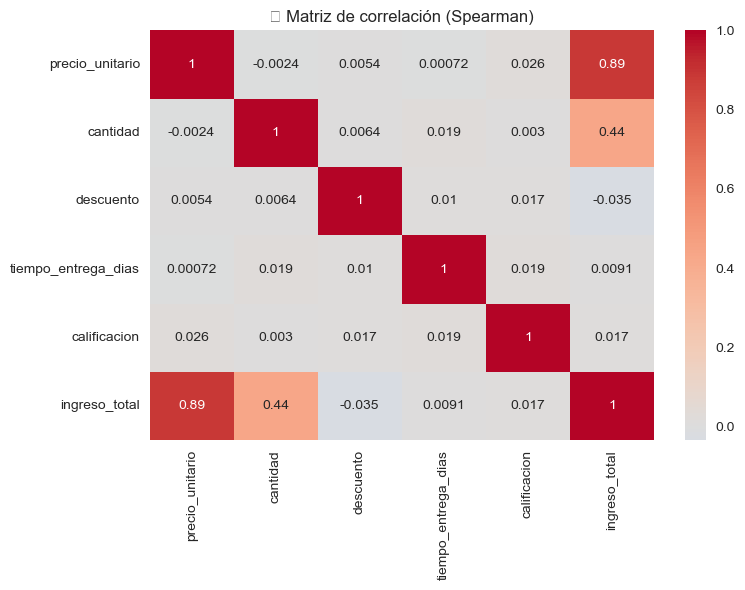

In [28]:
vars_num = ['precio_unitario', 'cantidad', 'descuento',
            'tiempo_entrega_dias', 'calificacion', 'ingreso_total']

corr_spearman = df[vars_num].corr(method='spearman')

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", center=0)
plt.title("🔗 Matriz de correlación (Spearman)")
plt.tight_layout()
plt.show()



Conclusión práctica

    Variables útiles para el modelo: precio_unitario y cantidad → tienen correlación significativa con ingreso_total.

    Variables descartables o de bajo impacto: descuento, tiempo_entrega_dias, calificacion → no aportan mucho valor predictivo.

    Esto te ayuda a seleccionar las variables más relevantes para tu modelo de regresión.



In [ ]:
import pandas as pd
from sqlalchemy import create_engine

# 1. Cargar DataFrame
df = pd.read_csv("dataset_pedidos_1.csv")

# 2. Conexión MySQL
user = 'python_user'
password = 'MiPassword123!'
host = 'localhost'
database = 'worldanalysis'

connection_url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
engine = create_engine(connection_url)

# 3. Nombre de la tabla
table_name = 'dataset_pedidos_1'

try:
    # Crear la tabla o reemplazarla si ya existe
    df.to_sql(table_name, engine, if_exists='replace', index=False)
    print(f"✅ La tabla '{table_name}' ha sido creada o reemplazada correctamente.")
except Exception as e:
    print(f"❌ Error al crear la tabla '{table_name}':", e)
finally:
    engine.dispose()  # Cierra el motor de conexión
